# Machine Learning Foundations

### *Applied Predictive Modeling, Evaluation, and Interpretation*

Name: Sabrina Palis

Dataset: Exoplanet Classification Dataset (Kaggle) https://www.kaggle.com/datasets/datatalesbyagos/exoplanet-classification-dataset


Repository: https://github.com/MinervaRose/applied-machine-learning

## 1. Problem Statement and Choice of Dataset

This project addresses a supervised learning classification problem. The objective is to build a machine learning model that predicts whether an observed astronomical signal corresponds to a confirmed exoplanet, a candidate exoplanet, or a false positive. The dataset used is the [Exoplanet Classification Dataset](https://www.kaggle.com/datasets/datatalesbyagos/exoplanet-classification-dataset), a unified PCA-based tabular dataset combining KOI, K2, and TOI exoplanet catalogs, publicly available on Kaggle.

This dataset is appropriate for machine learning because it contains structured numerical features derived from astronomical observations and includes a clear categorical target variable representing signal classification. The dataset has sufficient size and feature diversity to support training, evaluation, and interpretation of a predictive model. It is publicly available, non-synthetic, and suitable for academic analysis.


# 2. Environment Setup

This notebook is designed to run locally or in Google Colab using a standard CPU runtime. The dataset is loaded relative to the project directory. GPU acceleration is not required because the models used are classical scikit-learn algorithms that do not benefit from GPU execution. Running on CPU improves reproducibility and ensures compatibility across environments.

In [1]:
# Optional: Google Colab setup
# Uncomment only if running in Google Colab and using Google Drive storage
#Mount drive
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Go to directory
#%cd /content/drive/MyDrive/Capstone/applied-machine-learning/

/content/drive/MyDrive/Capstone/applied-machine-learning


In [3]:
DATA_PATH = "ML_ready_exoplanets.csv"

## Setup

In [4]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [5]:
 import sklearn
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler

## 3. Data Loading and Inspection

In [6]:
 df = pd.read_csv("ML_ready_exoplanets.csv")
 df.head()

,PC1,PC2,PC3,label,ra,dec,j_mag,h_mag,k_mag,kep_mag,planet_radius,orbital_period,star_teff,star_logg,star_radius,star_mass,lc_time0
0,-0.329993,-0.469118,-0.051703,2,297.00482,48.134129,14.254,13.900,13.826,15.436,14.60,19.899140,5853.0,4.544,0.868,0.961,175.850252
1,0.093289,-0.453369,0.408759,2,285.53461,48.285210,14.326,13.911,13.809,15.597,33.46,1.736952,5805.0,4.564,0.791,0.836,170.307565
2,-0.469821,-0.455314,0.015327,0,288.75488,48.226200,14.366,14.064,13.952,15.509,2.75,2.525592,6031.0,4.438,1.046,1.095,171.595550
3,-0.296522,0.062012,0.022569,0,296.28613,48.224670,14.528,14.113,14.132,15.714,3.90,11.094321,6046.0,4.486,0.972,1.053,171.201160
4,-0.399275,-0.189558,0.008973,0,296.28613,48.224670,14.528,14.113,14.132,15.714,2.77,4.134435,6046.0,4.486,0.972,1.053,172.979370


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19761 entries, 0 to 19760
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PC1             19761 non-null  float64
 1   PC2             19761 non-null  float64
 2   PC3             19761 non-null  float64
 3   label           19761 non-null  int64  
 4   ra              19761 non-null  float64
 5   dec             19761 non-null  float64
 6   j_mag           19761 non-null  float64
 7   h_mag           19761 non-null  float64
 8   k_mag           19761 non-null  float64
 9   kep_mag         19761 non-null  float64
 10  planet_radius   19761 non-null  float64
 11  orbital_period  19761 non-null  float64
 12  star_teff       19761 non-null  float64
 13  star_logg       19761 non-null  float64
 14  star_radius     19761 non-null  float64
 15  star_mass       19761 non-null  float64
 16  lc_time0        19761 non-null  float64
dtypes: float64(16), int64(1)
memory

In [8]:
df.describe()

,PC1,PC2,PC3,label,ra,dec,j_mag,h_mag,k_mag,kep_mag,planet_radius,orbital_period,star_teff,star_logg,star_radius,star_mass,lc_time0
count,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,1.976100e+04
mean,-0.133381,-0.086460,-0.030991,0.987248,225.530937,18.569540,12.532646,12.139621,12.050162,12.936044,15.410385,29.993902,5649.264781,4.340121,1.471246,0.970271,1.456737e+06
std,1.024262,0.799844,0.503856,0.792513,95.189927,36.993569,1.232746,1.228578,1.236581,1.964285,198.858223,606.676580,1165.439181,0.345673,4.335476,0.261247,1.208171e+06
min,-0.591683,-2.864373,-7.777481,0.000000,0.084680,-89.471513,4.097000,3.014000,2.311000,4.627800,0.036257,0.152076,2520.000000,0.047000,0.109000,0.000000,1.205659e+02
25%,-0.442493,-0.411154,-0.044433,0.000000,136.755357,-6.268329,12.258000,11.868000,11.776000,11.715900,1.380000,2.537071,5217.000000,4.228000,0.820000,0.949000,1.399876e+02
50%,-0.383010,-0.209012,-0.009771,1.000000,285.099760,38.384121,12.661500,12.274000,12.188000,13.030900,3.280000,5.351287,5711.000000,4.410000,1.029030,0.954000,2.457147e+06
75%,-0.273000,-0.003262,0.001964,2.000000,294.618930,45.006290,13.027000,12.627000,12.539000,14.491000,12.463500,13.611650,6090.000000,4.521000,1.447080,0.959000,2.459357e+06
max,13.803377,24.012589,7.424680,3.000000,359.941195,89.086923,17.372000,17.615000,17.038000,20.003000,26042.900000,83830.000000,50000.000000,5.960650,229.908000,14.336000,2.460863e+06


### Initial Data Inspection

The dataset contains 19,761 observations and 17 columns. All features are numerical, and the dataset includes a categorical target variable labeled `label`, which represents the class of each astronomical signal. The absence of missing values indicates that the dataset is already well-structured and suitable for direct preprocessing.

Feature values span very different numeric ranges (for example orbital period versus stellar temperature), which suggests that feature scaling will likely be important before training a machine learning model. The dataset size is sufficient to support training and evaluation of a multi-class classifier.


## 4. Data Preparation and Preprocessing

In [9]:
# Separate X and y
X = df.drop("label", axis=1)
y = df["label"]

In [10]:
# Train/ test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [11]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Preprocessing Decisions

The dataset contains no missing values and all features are numerical, so no imputation or categorical encoding was required. The target variable was separated from the input features to prepare for supervised learning.

A train–test split was performed using stratified sampling to preserve class distribution between training and evaluation data. Feature scaling was applied using standard normalization because the numerical features vary widely in magnitude. Scaling helps many machine learning algorithms converge more effectively and prevents features with large numeric ranges from dominating the model.


## 5. Selecting and Training a Machine Learning Model

Because the target variable `label` is categorical with multiple classes (0–3), this is a supervised multi-class classification task.  
To support sound model selection, I train a simple interpretable baseline model (Logistic Regression) and compare it with two nonlinear ensemble methods (Random Forest and Gradient Boosting), which often perform well on tabular datasets.

In [12]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
# Define models (pipeline)
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=2000, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            n_jobs=-1
        ))
    ]),
    "Gradient Boosting": Pipeline([
        ("model", GradientBoostingClassifier(random_state=42))
    ])
}


In [14]:
# Training
trained_models = {}

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"Trained: {name}")

Trained: Logistic Regression
Trained: Random Forest
Trained: Gradient Boosting


In [15]:
# Quick training score check
for name, model in trained_models.items():
    train_acc = model.score(X_train, y_train)
    print(f"{name} training accuracy: {train_acc:.4f}")

Logistic Regression training accuracy: 0.6143
Random Forest training accuracy: 1.0000
Gradient Boosting training accuracy: 0.7696


## 6. Evaluating Models Performance

Models are evaluated on the held-out test set to measure generalization performance.  
Because this is a multi-class classification task, accuracy and class-wise precision/recall/F1-score are used to assess model behavior.

In [16]:
# Imports
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# Evaluating all models
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print(f"Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression
Test Accuracy: 0.6094
              precision    recall  f1-score   support

           0       0.59      0.60      0.59      1263
           1       0.59      0.70      0.64      1483
           2       0.67      0.52      0.58      1203
           3       0.00      0.00      0.00         4

    accuracy                           0.61      3953
   macro avg       0.46      0.45      0.45      3953
weighted avg       0.61      0.61      0.61      3953


Random Forest
Test Accuracy: 0.7736
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1263
           1       0.73      0.78      0.75      1483
           2       0.81      0.74      0.77      1203
           3       1.00      0.50      0.67         4

    accuracy                           0.77      3953
   macro avg       0.83      0.70      0.75      3953
weighted avg       0.78      0.77      0.77      3953


Gradient Boosting
Test Accuracy: 0.7220


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1263
           1       0.67      0.73      0.70      1483
           2       0.80      0.69      0.74      1203
           3       0.50      0.75      0.60         4

    accuracy                           0.72      3953
   macro avg       0.67      0.73      0.69      3953
weighted avg       0.73      0.72      0.72      3953



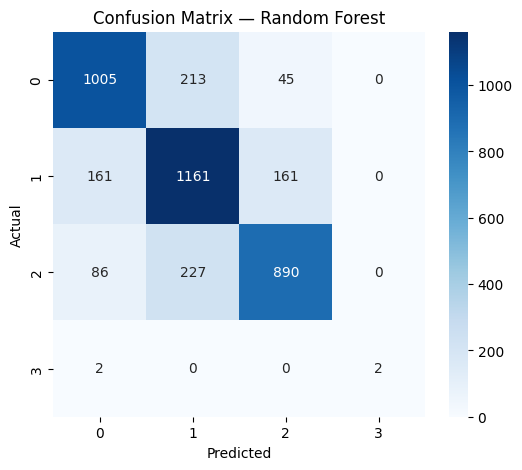

In [18]:
# Picking the highest accuracy model (confusion matrix)
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Evaluation Summary


Model performance differs significantly across algorithms. Logistic Regression serves as a baseline and achieves moderate accuracy (≈61%), suggesting that linear decision boundaries are insufficient to fully capture the structure of the dataset. Gradient Boosting improves performance to ≈72%, indicating that nonlinear ensemble methods better model the relationships between features.

The Random Forest classifier achieves the highest test accuracy (≈77%), making it the strongest performing model overall. However, its perfect training accuracy suggests a risk of overfitting, meaning it may be memorizing patterns in the training data rather than generalizing optimally.

The confusion matrix shows that most misclassifications occur between classes 0, 1, and 2, which likely share overlapping feature characteristics. Class 3 has very few samples, which limits reliable evaluation and explains unstable precision and recall values. This class imbalance introduces uncertainty in interpreting performance for rare signal categories.

## 7. Summary

This project modeled a supervised multi-class classification problem to predict the class of astronomical signals in an exoplanet dataset. Three models were trained and compared: Logistic Regression as a baseline, Random Forest, and Gradient Boosting. The Random Forest model achieved the best performance with approximately 77% test accuracy, outperforming the other approaches. However, its perfect training accuracy suggests possible overfitting, highlighting a tradeoff between model complexity and generalization. A key limitation is class imbalance, particularly the very small number of samples in class 3, which reduces confidence in evaluating rare signal categories.

In [19]:
pip freeze > requirements.txt